# Illustrative examples of MCDA methods: CRADIS, COPRAS, ARAS, MARCOS, PROMETHEE II, PROSA-C, SAW, AHP

## Import necessary packages

Import of the necessary Python packages necessary for running codes provided in examples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib

Import the necessary Python modules from `pyrepo-mcda` package.

In [2]:
from pyrepo_mcda.mcda_methods import CRADIS, AHP, MARCOS, SAW, ARAS, COPRAS, PROMETHEE_II, PROSA_C
from pyrepo_mcda.mcda_methods import TOPSIS, VIKOR, MABAC, EDAS, SPOTIS, WASPAS

from pyrepo_mcda import normalizations as norms
from pyrepo_mcda.additions import rank_preferences
from pyrepo_mcda import correlations as corrs
from pyrepo_mcda import weighting_methods as mcda_weights

Supporting function for running provided examples including visualization. Here are functions called `plot_barplot` for displaying bar chart showing rankings and `draw_heatmap` for displaying heat map with rankings correlations. You can copy and customize their codes to your case. Class `Create_dictionary` helps create a correlation matrix to show rankings correlations.

In [3]:
# bar (column) chart
def plot_barplot(df_plot, legend_title, num):
    """
    Visualization method to display column chart of alternatives rankings obtained with 
    different methods.

    Parameters
    ----------
        df_plot : DataFrame
            DataFrame containing rankings of alternatives obtained with different methods.
            The particular rankings are included in subsequent columns of DataFrame.
        title : str
            Title of the legend (Name of group of explored methods, for example MCDA methods or Distance metrics).
    
    Examples
    ----------
    >>> plot_barplot(df_plot, legend_title='MCDA methods')
    """
    step = 1
    list_rank = np.arange(1, len(df_plot) + 1, step)

    ax = df_plot.plot(kind='bar', width = 0.8, stacked=False, edgecolor = 'black', figsize = (9,4))
    ax.set_xlabel('Alternatives', fontsize = 12)
    ax.set_ylabel('Rank', fontsize = 12)
    ax.set_yticks(list_rank)

    ax.set_xticklabels(df_plot.index, rotation = 'horizontal')
    ax.tick_params(axis = 'both', labelsize = 12)
    y_ticks = ax.yaxis.get_major_ticks()
    ax.set_ylim(0, len(df_plot) + 1)

    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
    ncol=4, mode="expand", borderaxespad=0., edgecolor = 'black', title = legend_title, fontsize = 12)

    ax.grid(True, linestyle = ':')
    ax.set_axisbelow(True)
    plt.tight_layout()
    legend_title = legend_title.replace("$", "")
    plt.savefig('./results/' + 'bar_chart_' + legend_title + str(num) + '.eps')
    plt.savefig('./results/' + 'bar_chart_' + legend_title + str(num) + '.png')
    plt.show()


# heat maps with correlations
def draw_heatmap(df_new_heatmap, title, num):
    """
    Visualization method to display heatmap with correlations of compared rankings generated using different methods
    
    Parameters
    ----------
        data : DataFrame
            DataFrame with correlation values between compared rankings
        title : str
            title of chart containing name of used correlation coefficient
    
    Examples
    ---------
    >>> draw_heatmap(df_new_heatmap, title)
    """
    plt.figure(figsize = (8, 5))
    sns.set(font_scale = 1.2)
    heatmap = sns.heatmap(df_new_heatmap, annot=True, fmt=".3f", cmap="RdYlGn",
                          linewidth=0.5, linecolor='w')
    plt.yticks(va="center")
    plt.xlabel('MCDA methods')
    plt.title('Correlation: ' + title)
    plt.tight_layout()
    title = title.replace("$", "")
    plt.savefig('./results/' + 'correlations_' + title + str(num) + '.eps')
    plt.savefig('./results/' + 'correlations_' + title + str(num) + '.png')
    plt.show()
    
# Create dictionary class
class Create_dictionary(dict):
  
    # __init__ function
    def __init__(self):
        self = dict()
          
    # Function to add key:value
    def add(self, key, value):
        self[key] = value

An example decision problem involves selecting the best alternative for the location of an offshore wind farm based on Ziemba, P., Wątróbski, J., Zioło, M., & Karczmarczyk, A. (2017). Using the PROSA method in offshore wind farm location problems. Energies, 10(11), 1755. DOI: https://doi.org/10.3390/en10111755. 
The problem includes four alternatives evaluated against twelve criteria. The evaluation criteria are displayed below. Preference direction `Max` denotes profit criteria with maximization aim, and `Min` represents cost criteria with minimalization aim.

In this case, the preference function V-shape for PROMETHEE II and PROSA-C was selected, which means that there is required a vector `p` (Preference Threshold) with values of the threshold of absolute preference, above which there is a total preference for one of the two actions and assigning the preference degree the value of 1.

More detailed information about preference functions, preference and indifference thresholds are available in reference paper:

Papathanasiou, J., & Ploskas, N. (2018). Promethee. In Multiple Criteria Decision Aid (pp. 57-89). Springer, Cham. DOI: https://doi.org/10.1007/978-3-319-91648-4_3

In [4]:
crits = pd.read_csv('example1criteria.csv', index_col = 'Cj')

In [5]:
crits

,Criterion Name,Unit of Measurement,Preference Direction,Weight of Criterion,Preference function for PROMETHEE II and PROSA-C,Preference Threshold (p) for PROMETHEE II and PROSA-C
Cj,,,,,,
C1,Investment cost,mln PLN,Min,20.00,V-shape,7280.0
C2,Payback period,years,Min,5.00,V-shape,4.0
C3,Distance from power stations,km,Min,5.00,V-shape,13.4
C4,Mean sea water depth,m,Min,1.67,V-shape,7.4
C5,Undersea geological condition,points,Min,1.67,V-shape,3.0
C6,Employment,number,Max,11.67,V-shape,1662.0
C7,Conflict with fisheries,points,Min,11.67,V-shape,3.0
C8,Density of shipping traffic,points,Min,5.00,V-shape,3.0
C9,Distance from shore,km,Max,5.00,V-shape,13.8


Load a decision matrix containing the performance values of an example decision problem from a CSV file as a `DataFrame`.

In [6]:
data = pd.read_csv('./results/dataset1.csv', index_col = 'Ai')

In [7]:
data

,$C_{1}$,$C_{2}$,$C_{3}$,$C_{4}$,$C_{5}$,$C_{6}$,$C_{7}$,$C_{8}$,$C_{9}$,$C_{10}$,$C_{11}$,$C_{12}$
Ai,,,,,,,,,,,,
$A_{1}$,16347.0,9.0,73.8,36.7,1.5,3730.0,2.0,1.0,38.8,4.0,1720524.0,40012.0
$A_{2}$,14219.0,8.5,55.0,36.0,2.0,3240.0,1.0,1.0,33.1,2.0,1496512.0,34803.0
$A_{3}$,8160.0,9.0,64.8,28.5,2.0,1860.0,2.0,2.0,45.8,4.0,858830.0,19973.0
$A_{4}$,8160.0,8.5,62.5,29.5,1.5,1860.0,1.0,3.0,27.3,3.0,858830.0,19973.0


Convert a DataFrame with decision matrix `data` to a `NumPy` array `matrix` to use the `NumPy` package for computation

In [8]:
matrix = data.to_numpy()

Provide criteria weights. The weights must be normalized using sum normalization and give a value of 1 after being summed.

In [9]:
weights = np.array([20, 5, 5, 1.67, 1.67, 11.67, 11.67, 5, 5, 16.67, 8.33, 8.33])
weights = weights / np.sum(weights)

In [10]:
weights

array([0.19998   , 0.049995  , 0.049995  , 0.01669833, 0.01669833,
       0.11668833, 0.11668833, 0.049995  , 0.049995  , 0.16668333,
       0.08329167, 0.08329167])

Provide criteria types. Assign 1 to profit criteria and -1 to cost criteria. Other values are not allowed.

In [11]:
types = np.array([-1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1])

Create the DataFrame for results rankings, including rankings provided by investigated MCDA methods.

In [12]:
alt_names = [r'$A_{' + str(el) + '}$' for el in range(1, matrix.shape[0] + 1)]
rank_results = pd.DataFrame(index=alt_names)

All MCDA methods investigated here sort alternatives according to preference values in descending order. It means that the best alternative has the highest preference value. Thus, we rank alternatives using the `rank_preferences` function with parameter `reverse=True`.

## PROMETHEE II

In this case, you will use the V-shape preference function, so provide vector `p`.

In [13]:
p = np.array([7280, 4, 13.4, 7.4, 3, 1662, 3, 3, 13.8, 3, 766240, 17820])

In [14]:
# Create the PROMETHEE II method object
promethee_II = PROMETHEE_II()
# Assign preference functions to each criterion
preference_functions = [promethee_II._vshape_function for pf in range(len(weights))]

# Calculate the utility function value (the preference value) for each alternative
pref = promethee_II(matrix, weights, types, preference_functions, p = p)
# Determine the ranking based on `pref` by sorting it in descending order (reverse = True)
rank = rank_preferences(pref, reverse=True)
# Save the PROMETHEE II ranking in the DataFrame
rank_results['PROMETHEE II'] = rank

PROMETHEE II utility function values

In [15]:
pref

array([-0.04449699,  0.18838474, -0.09537616, -0.04851159])

The best scored is alternative $A_2$ because it has the highest preference value.

PROMETHEE II ranking

In [16]:
rank

array([2, 1, 4, 3])

If you would like to use the linear preference function (V-shape with indifference) or Level function, Gaussian function, using PROMETHEE II is as follows: pref = promethee_II(matrix, weights, types, preference_functions, p = p, q = q) with additional `q` providing. U-shape function requires `q`, and the Usual function does not require any parameter.

Here is a summary of the required parameters for the preference function for PROMETHEE II and PROSA-C:

- Usual: No parameters
- U-shape: `q`
- V-shape: `p`
- Level: `p`, `q`
- Linear (V-shape with indifference): `p`, `q`
- Gaussian: `p`, `q`

## PROSA-C

Using PROSA-C is similar to PROMETHEE II, but it requires providing an additional argument, a vector `s` including sustainability coefficients for each criterion. The sustainability coefficient determines the reduction of criteria compensation. If you do not specify the arguments `p`, `q`, and `s` for the PROMETHEE II and PROSA methods, they will be set automatically, based on:

Ziemba, P. (2020). Multi-criteria stochastic selection of electric vehicles for the sustainable development of local government and state administration units in Poland. Energies, 13(23), 6299. DOI: https://doi.org/10.3390/en13236299 in following way:

u = np.sqrt(np.sum(np.square(np.mean(matrix, axis = 0) - matrix), axis = 0) / matrix.shape[0])

p = 2 * u

q = 0.5 * u

s = np.repeat(0.3, len(weights))

In [17]:
s = np.repeat(0.3, len(weights))
prosa_c = PROSA_C()
pref = prosa_c(matrix, weights, types, preference_functions, p = p, s = s)
rank = rank_preferences(pref, reverse=True)
rank_results['PROSA C'] = rank

## ARAS

In contrast to PROMETHEE II and PROSA-C, ARAS requires normalization of the decision matrix. In the ARAS method you can choose one technique for normalization decision matrix from five available: `linear_normalization`, `minmax_normalization`, `max_normalization`, `sum_normalization` and `vector_normalization`. The default normalization for ARAS is `sum_normalization`. The normalization method is chosen in method object initialization in the constructor of the method. In the case of other MCDA methods presented below, normalization method selection is analogous.

In [18]:
aras = ARAS(normalization_method=norms.linear_normalization)
pref = aras(matrix, weights, types)
rank = rank_preferences(pref, reverse=True)
rank_results['ARAS'] = rank

## COPRAS

The COPRAS method also requires the normalization of the decision matrix. The default normalization method for COPRAS is the Sum normalization used like for profit criteria because in COPRAS decision matrix is normalized before dividing criteria into profit and cost. There is also an option to select another normalization method from `normalizations` submodule. Chosen normalization method is performed automatically like for profit criteria, according to the COPRAS algorithm.

In [19]:
copras = COPRAS(normalization_method = norms.sum_normalization)
pref = copras(matrix, weights, types)
rank = rank_preferences(pref, reverse=True)
rank_results['COPRAS'] = rank

## CRADIS

The CRADIS method enables choosing a normalization technique. The default is `linear_normalization`.

In [20]:
cradis = CRADIS()
pref = cradis(matrix, weights, types)
rank = rank_preferences(pref, reverse=True)
rank_results['CRADIS'] = rank

## MARCOS

The MARCOS method does not enable the selection of the normalization technique because this method normalizes the decision matrix using a specific method involving ideal and anti-ideal solutions.

In [21]:
marcos = MARCOS()
pref = marcos(matrix, weights, types)
rank = rank_preferences(pref, reverse=True)
rank_results['MARCOS'] = rank

## SAW

The SAW method enables choosing a normalization technique. The default is `linear_normalization`.

In [22]:
saw = SAW()
pref = saw(matrix, weights, types)
rank = rank_preferences(pref, reverse=True)
rank_results['SAW'] = rank

Display rankings determined by each investigated MCDA method.

In [23]:
rank_results

,PROMETHEE II,PROSA C,ARAS,COPRAS,CRADIS,MARCOS,SAW
$A_{1}$,2,3,3,2,3,3,3
$A_{2}$,1,1,1,1,1,1,1
$A_{3}$,4,4,4,4,4,4,4
$A_{4}$,3,2,2,3,2,2,2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


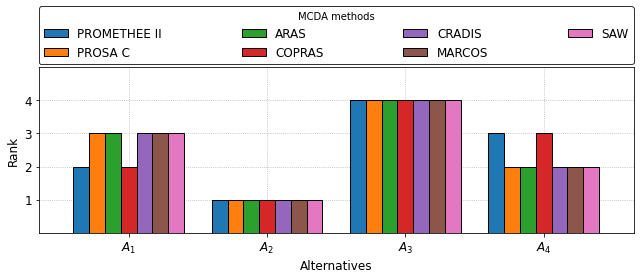

In [24]:
plot_barplot(rank_results, legend_title='MCDA methods', num = 1)

Calculate correlations between rankings using Weighted Spearman correlation coefficient.

In [25]:
method_types = list(rank_results.columns)
dict_new_heatmap_rw = Create_dictionary()
for el in method_types:
    dict_new_heatmap_rw.add(el, [])


# heatmaps for correlations coefficients
for i, j in [(i, j) for i in method_types[::-1] for j in method_types]:
    dict_new_heatmap_rw[j].append(corrs.weighted_spearman(rank_results[i], rank_results[j]))

df_new_heatmap_rw = pd.DataFrame(dict_new_heatmap_rw, index = method_types[::-1])
df_new_heatmap_rw.columns = method_types

Display the heat map of correlations.

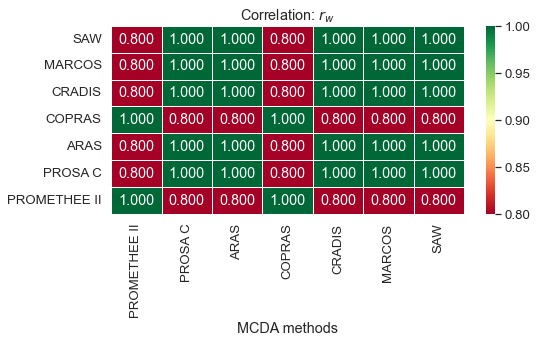

In [26]:
# correlation matrix with rw coefficient
draw_heatmap(df_new_heatmap_rw, r'$r_w$', num = 1)

## AHP

### Classical usage of AHP

The classical application of AHP using pairwise comparisons of criteria and alternatives by decision-maker based on:

Papathanasiou, J., & Ploskas, N. (2018). Ahp. In Multiple Criteria Decision Aid 
(pp. 109-129). Springer, Cham.
DOI: https://doi.org/10.1007/978-3-319-91648-4_5

Step 1a. Provide matrix with pairwise comparison values of criteria

In [27]:
PCcriteria = np.array([[1, 1, 5, 3], [1, 1, 5, 3], 
[1/5, 1/5, 1, 1/3], [1/3, 1/3, 3, 1]])

In [28]:
PCcriteria

array([[1.        , 1.        , 5.        , 3.        ],
       [1.        , 1.        , 5.        , 3.        ],
       [0.2       , 0.2       , 1.        , 0.33333333],
       [0.33333333, 0.33333333, 3.        , 1.        ]])

Step 1b. Provide matrices with pairwise comparison values for alternatives

In [29]:
PCM1 = np.array([[1, 5, 1, 1, 1/3, 3],
[1/5, 1, 1/3, 1/5, 1/7, 1],
[1, 3, 1, 1/3, 1/5, 1],
[1, 5, 3, 1, 1/3, 3],
[3, 7, 5, 3, 1, 7],
[1/3, 1, 1, 1/3, 1/7, 1]])
PCM2 = np.array([[1, 7, 3, 1/3, 1/3, 1/3],
[1/7, 1, 1/3, 1/7, 1/9, 1/7],
[1/3, 3, 1, 1/5, 1/5, 1/5],
[3, 7, 5, 1, 1, 1],
[3, 9, 5, 1, 1, 1],
[3, 7, 5, 1, 1, 1]])
PCM3 = np.array([[1, 1/9, 1/7, 1/9, 1, 1/5],
[9, 1, 1, 1, 5, 3],
[7, 1, 1, 1, 5, 1],
[9, 1, 1, 1, 7, 3],
[1, 1/5, 1/5, 1/7, 1, 1/3],
[5, 1/3, 1, 1/3, 3, 1]])
PCM4 = np.array([[1, 1/5, 1/5, 1/3, 1/7, 1/5],
[5, 1, 1, 3, 1/3, 1],
[5, 1, 1, 1, 1/3, 1],
[3, 1/3, 1, 1, 1/7, 1],
[7, 3, 3, 7, 1, 5],
[5, 1, 1, 1, 1/5, 1]])

Step 2. Create the AHP method object and check the consistency of matrix with criteria comparison. Values equal and below 0.1 $(\leq 0.1)$ denote that the matrix is consistent and it is correct.

In [30]:
ahp = AHP()

In [31]:
ahp._check_consistency(PCcriteria)

Inconsistency index:  0.01610868948440318


Step 3. Calculate the priority vector of criteria (criteria weights). The AHP method can be used only for criteria weights determination incorporating a decision-maker.

In [32]:
weights = ahp._calculate_eigenvector(PCcriteria)

AHP criteria weights:

In [33]:
weights

array([0.38986164, 0.38986164, 0.06792478, 0.15235193])

Step 4. Form pairwise comparison matrices of the alternatives for each criterion.

In [34]:
alt_matrices = []
alt_matrices.append(PCM1)
alt_matrices.append(PCM2)
alt_matrices.append(PCM3)
alt_matrices.append(PCM4)

Step 5. This step checks the consistency of pairwise comparison matrices of the alternatives. Values equal and below 0.1 denote that the matrix is consistent and it is correct.

In [35]:
calculate_priority_vector_method = ahp._calculate_eigenvector
pref = ahp._classic_ahp(alt_matrices, weights, calculate_priority_vector_method)

Inconsistency index:  0.03349113123332669
Inconsistency index:  0.026437064499443722
Inconsistency index:  0.022144721786307425
Inconsistency index:  0.039785112041738534


AHP utility (preference) function values:

In [36]:
pref

array([0.11737682, 0.07132502, 0.09472062, 0.21164765, 0.35008026,
       0.15484963])

In [37]:
rank = rank_preferences(pref, reverse = True)

AHP ranking

In [38]:
rank

array([4, 6, 5, 2, 1, 3])

### Another usage of AHP for ranking generation with numerical performance values, weights and criteria types

If you have a decision matrix with numerical performance values, a vector with numerical criteria weights, and determined criteria types (profit or cost), you can use the AHP method like other MCDA methods (for example, SAW):

In [39]:
matrix = np.array([[0.75, 0.50, 0.75, 0, 0, 0, 1],
[0.75, 1, 0.75, 0, 0, 0, 0.75],
[0.75, 0.75, 0.75, 0, 0.50, 0.25, 1],
[0.50, 0.50, 0.75, 1, 0.50, 0, 0.75]])

weights = np.array([0.1, 0.1, 0.1, 0.15, 0.2, 0.25, 0.1])

types = np.array([1, 1, 1, 1, 1, 1, 1])

ahp = AHP(normalization_method=norms.linear_normalization)
pref = ahp(matrix, weights, types)

In [40]:
pref

array([0.35      , 0.375     , 0.825     , 0.64166667])

In [41]:
rank = rank_preferences(pref, reverse = True)

In [42]:
rank

array([4, 3, 1, 2])